In [1]:
function nextGeneration(populationSize, proportion, p0to1 = 0, p1to0 = 0, selectionFactor = 0)
    """
    Returns the new vector of population and its characteristic, 
    using the vector of the old generation and its characteristic.
    p0to1 is the transition probability from state 0 to state 1 in the mutation case
    p1to0 is the transition probability from state 1 to state 0 in the mutation case
    selectionFactor is the factor of selection for state 1 in the selection case
    """
    
    # Number of 1 in the old generation
    newProportion0 = floor(proportion*populationSize)
    
    # Mutations
    if(p0to1 > 0)
        for j in 1:floor(populationSize*(1-proportion))
        # rand() gives a number in (0,1). Simulation of a random variable following a Bernoulli distribution
            if rand() <= p0to1
                newProportion0 += 1
            end
        end    
    end

    if (p1to0 > 0)
        for j in 1:floor(populationSize*(proportion))
            if rand() <= p1to0
                newProportion0 -= 1
            end
        end
    end
        
    newProportion = 0
    
    # Next Generation
    if (selectionFactor == 0)
        for i in 1:populationSize
            if rand() < (newProportion0/populationSize)
                newProportion += 1
            end
        end
    else
        for i in 1:populationSize
            if rand() < (newProportion0*(1+selectionFactor)/(newProportion0*(1+selectionFactor)+populationSize-newProportion0))
                newProportion += 1
            end
        end  
    end
    return (newProportion/populationSize)
end

nextGeneration (generic function with 4 methods)

In [2]:
function trajectory(populationSize, initialProportion, finalTime, p0to1 = 0, p1to0 = 0, selectionFactor = 0)
    """
    Run the Wright-Fisher model algorithm.
    Returns the whole trajectory of proportions and the time of absorption (0 if no absorption)
    finalTime is how many generations you produce
    p0to1 and p1to0 are transition probabilities for the mutations case
    selectionFactor is the factor of selection for state 1 in the selection case
    """
    
    listOfProportions = zeros(Float64, finalTime)
    infTimeAbsorption = 0
    
    # Initializing the population
    currentProportion = initialProportion
    
    # First proportion added to the trajectory
    listOfProportions[1] = currentProportion

    for time in 2:finalTime
        
        currentProportion = nextGeneration(populationSize, currentProportion, p0to1, p1to0, selectionFactor)
        
        if (infTimeAbsorption == 0 && (currentProportion == 0 || currentProportion == 1) && initialProportion!=0 && initialProportion!=1)
            infTimeAbsorption = time-1
        end
        
        # Adding the proportion to the trajectory
        listOfProportions[time] = currentProportion
    end
    
    # Returns the whole trajectory
    return infTimeAbsorption, listOfProportions
end  

trajectory (generic function with 4 methods)

In [3]:
function plotTrajectory(populationSize, initialProportion, finalTime, p0to1 = 0, p1to0 = 0, selectionFactor = 0)
    """
    Plot a trajectory
    """
    
    ioff()
    
    time, traj = trajectory(populationSize, initialProportion, finalTime, p0to1, p1to0, selectionFactor)
    listOfTimes = collect(1:length(traj))
    title("Proportion au cours du temps")
    xlabel("Temps")
    ylabel("Proportion")
    ylim(0,1)
    grid(true)

    plot(listOfTimes, traj, color="red")
    show()
end

plotTrajectory (generic function with 4 methods)

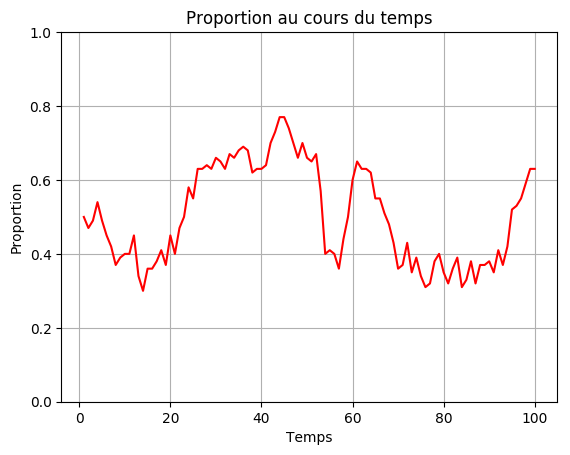

In [19]:
### Example of a trajectory ###

using PyPlot

populationSize = 100
initialProportion = 0.5
finalTime = 100
p0to1 = 0
p1to0 = 0
selectionFactor = 0
plotTrajectory(populationSize, initialProportion, finalTime, p0to1, p1to0, selectionFactor)

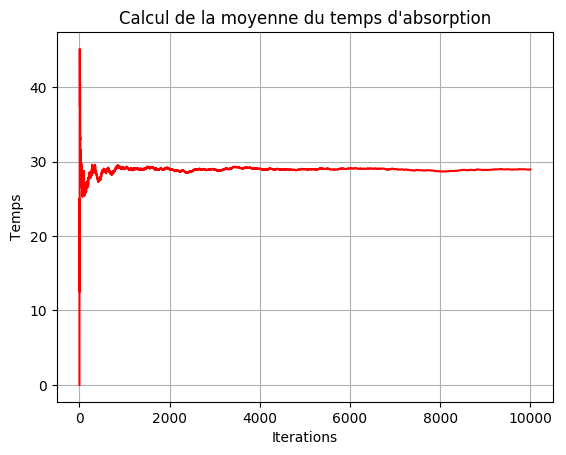

In [23]:
using Statistics

numberOfIterations = 10000
collectionOfTimeAbsorption = zeros(Float64, numberOfIterations)
meanTimeAbsorption = zeros(Float64, numberOfIterations)
standardDeviationTimeAbsorption = zeros(Float64, numberOfIterations)

res, vector = trajectory(populationSize, initialProportion, finalTime, p0to1, p1to0, selectionFactor)
collectionOfTimeAbsorption[1] = res
meanTimeAbsorption[1] = res
standardDeviationTimeAbsorption[1] = 0

for i in 2:numberOfIterations
    res, vector = trajectory(populationSize, initialProportion, finalTime, p0to1, p1to0, selectionFactor)
    collectionOfTimeAbsorption[i] = res
    meanTimeAbsorption[i] = mean(collectionOfTimeAbsorption[1:i])
end


plot(1:numberOfIterations, meanTimeAbsorption, color="red")
title("Calcul de la moyenne du temps d'absorption")
xlabel("Iterations")
ylabel("Temps")
grid(true)
show()


In [4]:
using Statistics

##function estimation_of_pN(Number_of_it, populationSize, initialProportion, finalTime, p0to1 = 0, p1to0 = 0, selectionFactor = 0)
##    collection_of_final_proportion = zeros(Float64, Number_of_it)
##    for i in 1:Number_of_it
##        res, traj = trajectory(populationSize, initialProportion, finalTime, p0to1, p1to0, selectionFactor)
##        if(res!=0)
##            collection_of_final_proportion[i] = traj[res]
##        else
##            return "error, finalTime too small"
##        end
##    end
##    return mean(collection_of_final_proportion), std(collection_of_final_proportion)
##end    

function estimation_of_pN(Number_of_it, populationSize, initialProportion, finalTime, p0to1 = 0, p1to0 = 0, selectionFactor = 0)
    collection_of_final_proportion = zeros(Float64, Number_of_it)
    for i in 1:Number_of_it
        res, traj = trajectory(populationSize, initialProportion, finalTime, p0to1, p1to0, selectionFactor)
        collection_of_final_proportion[i] = traj[res+1]
    end
    mean = sum([collection_of_final_proportion[i] for i=1:Number_of_it])/Number_of_it
    std = sqrt(sum([(collection_of_final_proportion[i] - mean)^2 for i=1:Number_of_it]) / (Number_of_it - 1))
    return mean, std
end 

estimation_of_pN (generic function with 4 methods)

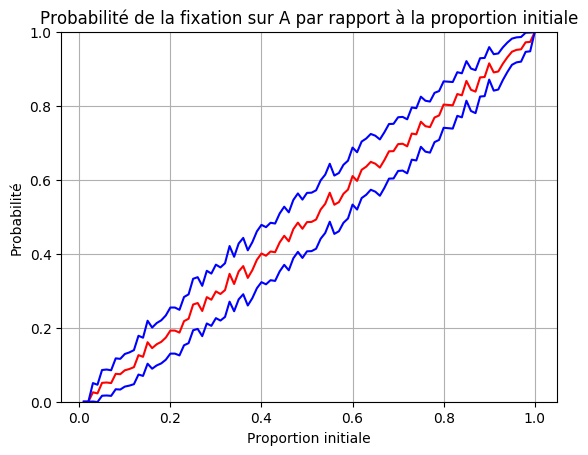

In [48]:
Nb_it = 2000
Nb_initial_propo = 100
populationSize = 40
finalTime = 3000
collection_of_initialProportions =  [i/Nb_initial_propo for i=1:Nb_initial_propo]
collection_of_estimated_pN = zeros(Float64, Nb_initial_propo)
collection_of_deviation = zeros(Float64, Nb_initial_propo)
for i in 1:Nb_initial_propo
    estimated_pN, deviation = estimation_of_pN(Nb_it, populationSize,collection_of_initialProportions[i],finalTime)
    collection_of_estimated_pN[i] = estimated_pN
    collection_of_deviation[i] = deviation
end

"""
Plot Px(XT = N) depending on the initial proportion x
"""
    
ioff()

title("Probabilité de la fixation sur A par rapport à la proportion initiale")
xlabel("Proportion initiale")
ylabel("Probabilité")
ylim(0,1)
grid(true)

plot(collection_of_initialProportions, collection_of_estimated_pN , color="red")
plot(collection_of_initialProportions, collection_of_estimated_pN+collection_of_deviation/sqrt(populationSize) , color="blue")
plot(collection_of_initialProportions, collection_of_estimated_pN-collection_of_deviation/sqrt(populationSize), color="blue")
show()

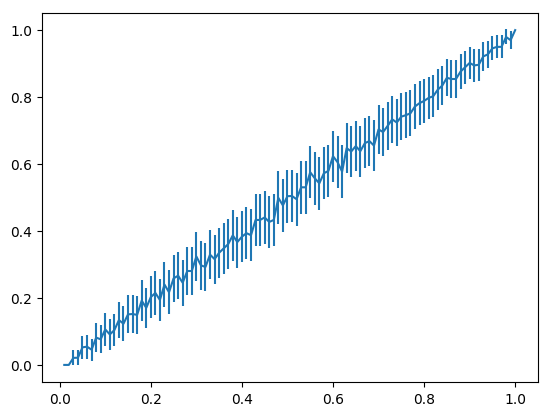

(PyObject <matplotlib.lines.Line2D object at 0x7fbd7651dfd0>, (), (PyObject <matplotlib.collections.LineCollection object at 0x7fbd76902860>,))

In [28]:
errorbar(collection_of_initialProportions, collection_of_estimated_pN, yerr = collection_of_deviation/sqrt(populationSize))

In [29]:
display("text/latex", """
Processus Diffusif
""")

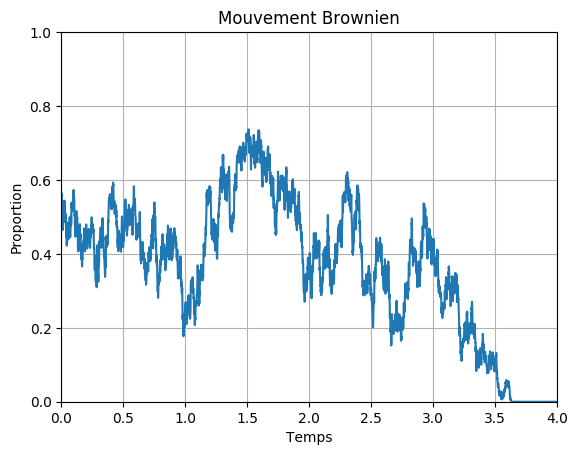

PyObject Text(24.000000000000007, 0.5, 'Proportion')

In [49]:
using PyPlot

N = 4000
collectionOfTimes = [i/1000 for i=1:4000]
initialProportion = 0.5
finalTime = 4*(N+1)
res, vector = trajectory(N, initialProportion, finalTime)
collectionOfProportions = zeros(Float64, length(collectionOfTimes))
for i in 1:length(collectionOfTimes)
    collectionOfProportions[i] = vector[floor(Int, collectionOfTimes[i]*N)+1]
end

plot(collectionOfTimes, collectionOfProportions)
title("Mouvement Brownien")
grid("true")
axis([0,4,0,1])
xlabel("Temps")
ylabel("Proportion")

In [31]:
display("text/latex", """
Exemple 27.13, espérance du temps de fixation sans sélection ni mutation
""")

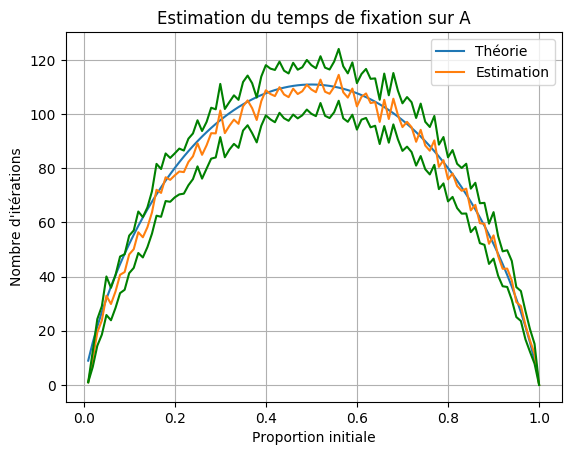

PyObject <matplotlib.legend.Legend object at 0x7fbd76b004e0>

In [53]:
using PyPlot

N = 80
Nb_Initial_Proportions = 100
finalTime = 2000
X = [i/Nb_Initial_Proportions for i=1:Nb_Initial_Proportions]

Nb_Iterations = 1000
Collection_Time_Absorption = zeros(Int64, Nb_Initial_Proportions, Nb_Iterations)
Y = zeros(Nb_Initial_Proportions)
Y_std = zeros(Nb_Initial_Proportions)

for prop in 1:Nb_Initial_Proportions
    for iter in 1:Nb_Iterations
        res, vector = trajectory(N, X[prop], finalTime)
        Collection_Time_Absorption[prop, iter] = res
    end
    Y[prop] = sum([Collection_Time_Absorption[prop,i] for i=1:Nb_Iterations])/Nb_Iterations
    Y_std[prop] = sqrt(sum([(Collection_Time_Absorption[prop,i] - Y[prop])^2 for i=1:Nb_Iterations]) / (Nb_Iterations - 1))
end

function theory(x)
    return -2*(x*log(x)+(1-x)*log(1-x))
end

Y_theory = [N*theory(X[i]) for i in 1:Nb_Initial_Proportions]
plot(X, Y_theory)

plot(X,Y)
plot(X, Y + Y_std/sqrt(N), color="green")
plot(X, Y - Y_std/sqrt(N), color="green")
grid("true")



title("Estimation du temps de fixation sur A")
xlabel("Proportion initiale")
ylabel("Nombre d'itérations")
legend(["Théorie", "Estimation"])

In [33]:
display("text/latex", """
Exemple 27.14, Probabilité de fixation de l'allèle A avec sélection
""")

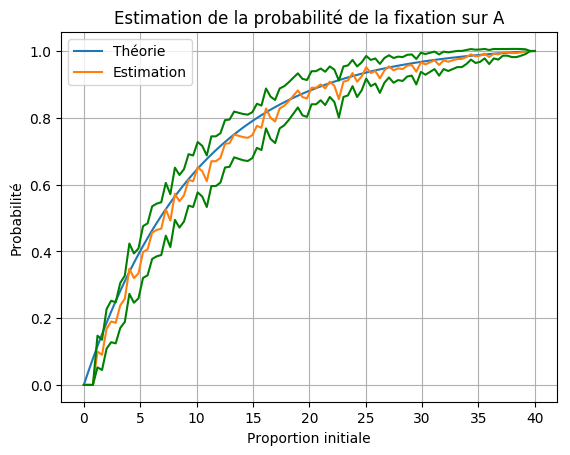

[0.0, 0.010101, 0.020202, 0.030303, 0.040404, 0.0505051, 0.0606061, 0.0707071, 0.0808081, 0.0909091, 0.10101, 0.111111, 0.121212, 0.131313, 0.141414, 0.151515, 0.161616, 0.171717, 0.181818, 0.191919, 0.20202, 0.212121, 0.222222, 0.232323, 0.242424, 0.252525, 0.262626, 0.272727, 0.282828, 0.292929, 0.30303, 0.313131, 0.323232, 0.333333, 0.343434, 0.353535, 0.363636, 0.373737, 0.383838, 0.393939, 0.40404, 0.414141, 0.424242, 0.434343, 0.444444, 0.454545, 0.464646, 0.474747, 0.484848, 0.494949, 0.505051, 0.515152, 0.525253, 0.535354, 0.545455, 0.555556, 0.565657, 0.575758, 0.585859, 0.59596, 0.606061, 0.616162, 0.626263, 0.636364, 0.646465, 0.656566, 0.666667, 0.676768, 0.686869, 0.69697, 0.707071, 0.717172, 0.727273, 0.737374, 0.747475, 0.757576, 0.767677, 0.777778, 0.787879, 0.79798, 0.808081, 0.818182, 0.828283, 0.838384, 0.848485, 0.858586, 0.868687, 0.878788, 0.888889, 0.89899, 0.909091, 0.919192, 0.929293, 0.939394, 0.949495, 0.959596, 0.969697, 0.979798, 0.989899, 1.0][0.0, 0.0, 0.

PyObject <matplotlib.legend.Legend object at 0x7f4c82a09358>

In [18]:
using PyPlot
N = 40
alpha = 2
s = alpha/N
#s = 0.01
#alpha = N*s
Nb_Initial_Proportions = 100
finalTime = 300
X = [(i-1)/(Nb_Initial_Proportions-1) for i=1:Nb_Initial_Proportions]
Nb_Iterations = 500

##we first estimate the probability Px(ZT0,1 = 1) :

Y = zeros(Float64, Nb_Initial_Proportions)
Y_std= zeros(Float64, Nb_Initial_Proportions)
for i in 1:Nb_Initial_Proportions
    estimated_pN, deviation = estimation_of_pN(Nb_Iterations, N,X[i],finalTime,0,0,s)
    Y[i] = estimated_pN
    Y_std[i] = deviation
end

##we compute the exact law 

function Ptheory(x)
    return (1-exp(-2*alpha*x))/(1-exp(-2*alpha))
end

Y_theory = [Ptheory(X[i]) for i in 1:Nb_Initial_Proportions]

##we create the plot
print(X)
print(Y)

plot(X*N, Y_theory)
plot(X*N,Y)
plot(X*N, Y + Y_std/sqrt(N), color="green")
plot(X*N, Y - Y_std/sqrt(N), color="green")
grid("true")
    
title("Estimation de la probabilité de la fixation sur A")
xlabel("Proportion initiale")
ylabel("Probabilité")
legend(["Théorie", "Estimation"])

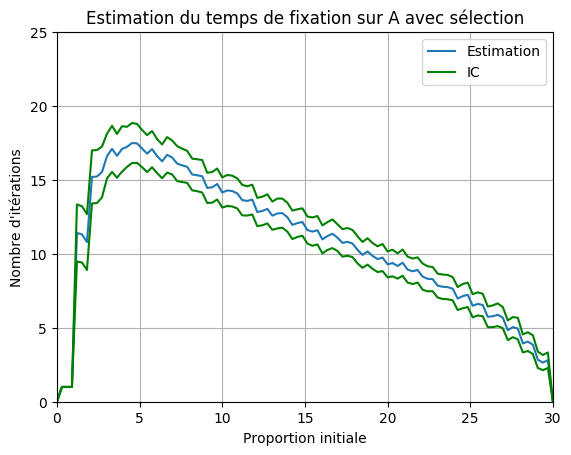

PyObject <matplotlib.legend.Legend object at 0x7fbd768a6c88>

In [52]:
using PyPlot

N = 30
alpha = 10
s = alpha/N
#s = 0.01
#alpha = N*s
Nb_Initial_Proportions = 100
finalTime = 500

##we estimate the mean of the fixation time

X = [(i-1)/(Nb_Initial_Proportions-1) for i=1:Nb_Initial_Proportions]
Nb_Iterations = 2000
Collection_Time_Absorption = zeros(Int64, Nb_Initial_Proportions, Nb_Iterations)
Y = zeros(Nb_Initial_Proportions)
Y_std = zeros(Nb_Initial_Proportions)

for prop in 1:Nb_Initial_Proportions
    for iter in 1:Nb_Iterations
        res, vector = trajectory(N, X[prop], finalTime,0,0,s)
        Collection_Time_Absorption[prop, iter] = res
    end
    Y[prop] = sum([Collection_Time_Absorption[prop,i] for i=1:Nb_Iterations])/Nb_Iterations
    Y_std[prop] = sqrt(sum([(Collection_Time_Absorption[prop,i] - Y[prop])^2 for i=1:Nb_Iterations]) / (Nb_Iterations - 1))
end

##we plot the result
plot(N*X,Y)
plot(N*X, Y + Y_std/sqrt(N), color="green")
plot(N*X, Y - Y_std/sqrt(N), color="green")
grid("true")
xlim(0,N)
ylim(0,25)
title("Estimation du temps de fixation sur A avec sélection")
xlabel("Proportion initiale")
ylabel("Nombre d'itérations")
legend(["Estimation","IC"])